In [ ]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Read the data
forest = pd.read_csv("forestfires.csv")
forest.head(3)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0


In [ ]:
#Get the shape of the data
forest.shape

(517, 13)

In [ ]:
#Get the information of the dataset
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [ ]:
#Describe the data
forest.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40


In [ ]:
#Convert datatype to category
forest[["month", "day"]] = forest[["month", "day"]].astype("category")

In [ ]:
#sns.countplot(x="month", data = forest)
forest.month.value_counts()
#the month of August has the most forest fire 

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [ ]:
#Get the Value count of all columns

for column in forest.select_dtypes("category"):
    print(f"\n{column}: \n{forest[column].value_counts()}\n")


month: 
aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64


day: 
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64



In [ ]:
#Get the unique values of all columns

for column in forest.select_dtypes("category"):
     print(f"\n{column}: \n{forest[column].unique()}\n")


month: 
['mar', 'oct', 'aug', 'sep', 'apr', ..., 'feb', 'jan', 'dec', 'may', 'nov']
Length: 12
Categories (12, object): ['apr', 'aug', 'dec', 'feb', ..., 'may', 'nov', 'oct', 'sep']


day: 
['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu']
Categories (7, object): ['fri', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed']



In [ ]:
#Check for duplicates
forest.duplicated().sum()

4

In [ ]:
# Dropping duplicate rows

forest.drop_duplicates(inplace = True)

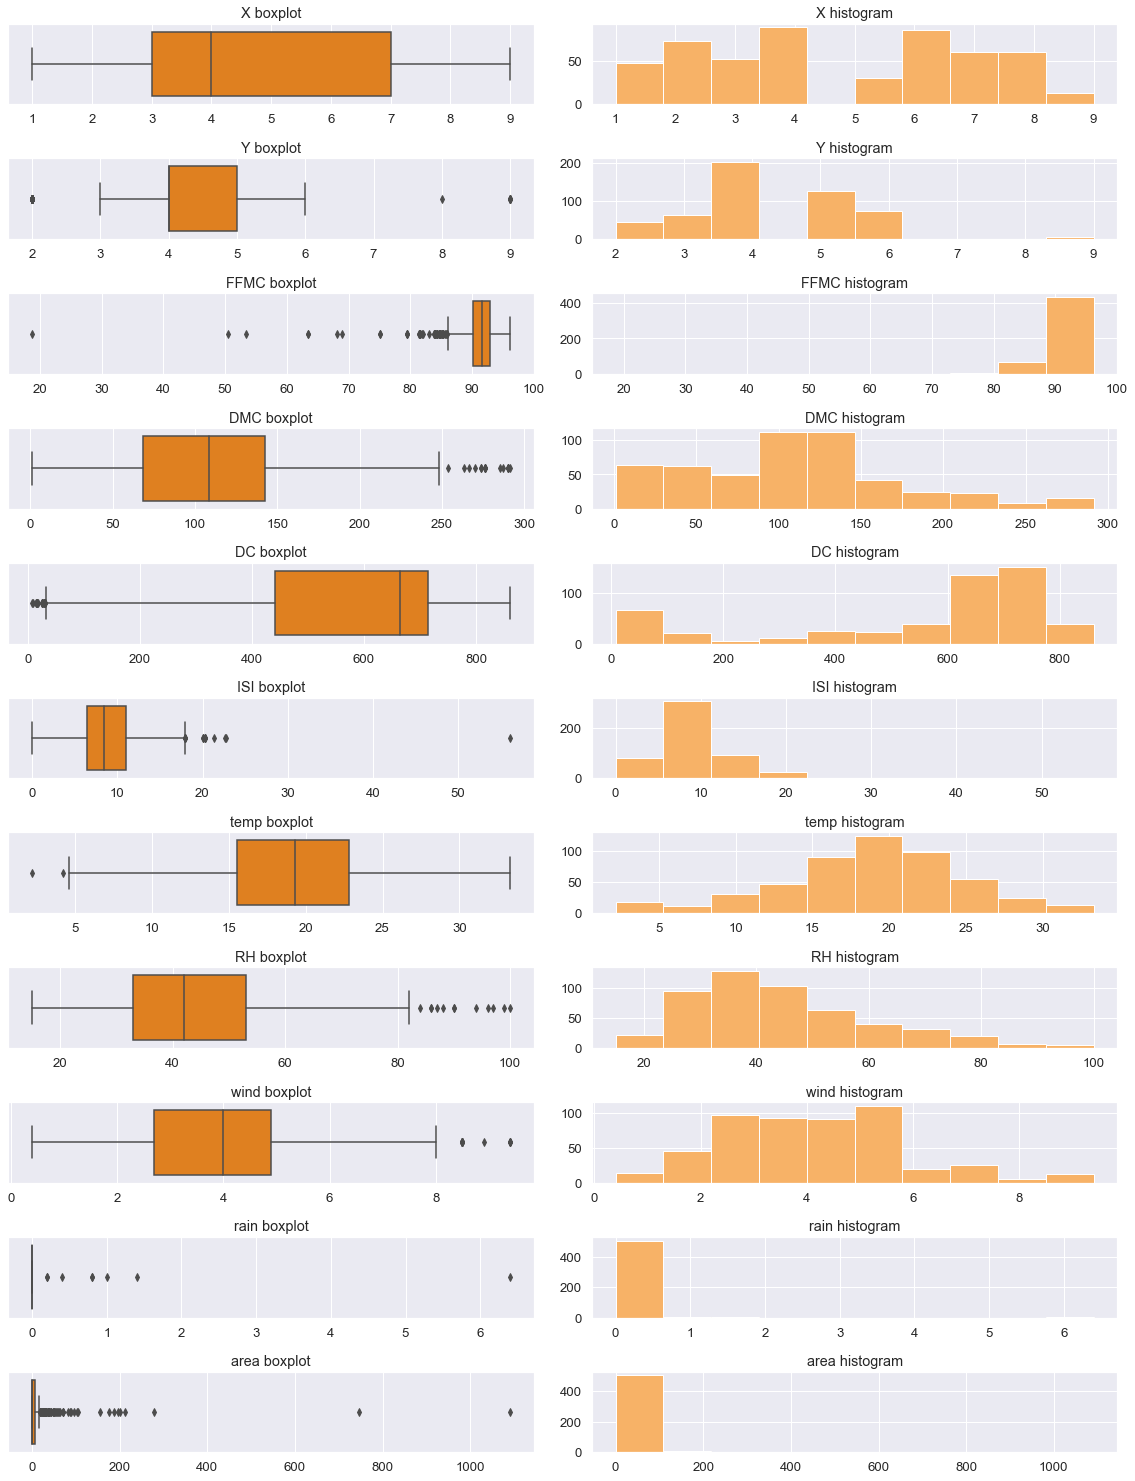

In [ ]:
features = forest.select_dtypes(["int64","float64"])

n = 1

sns.set_style('darkgrid')
sns.set(font_scale = 1.2)
plt.figure(figsize = (16, 28))

for feature in features:
    plt.subplot(15,2,n)
    sns.boxplot(x= feature, data=forest, palette = 'autumn').set(xlabel = None)
    plt.title(f'{feature} boxplot')
    n = n + 1
    
    plt.subplot(15,2,n)
    plt.hist(forest[feature], color = '#f7b267')
    plt.title(f'{feature} histogram')
    n = n + 1
    plt.tight_layout()

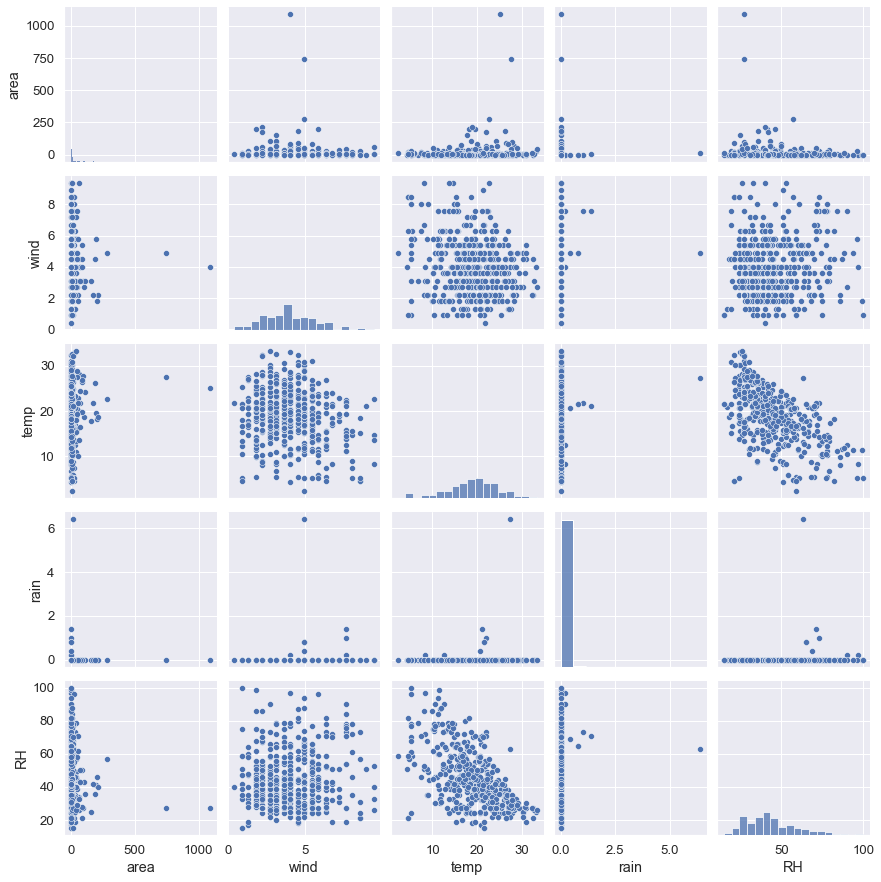

In [ ]:
#visualizing relations of most related attributes
attributes = ['area', 'wind', 'temp', 'rain', 'RH']
sns.pairplot(forest[attributes])
plt.show()

<AxesSubplot:>

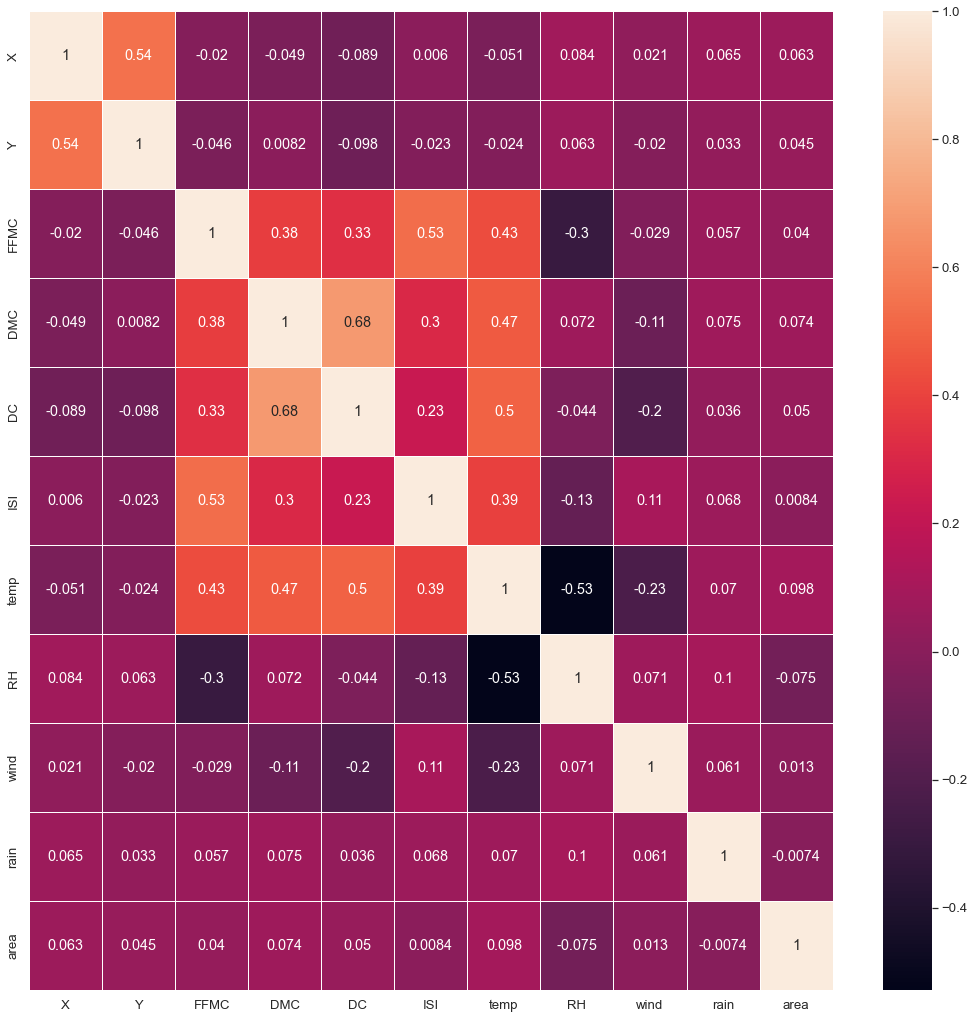

In [ ]:
plt.figure(figsize=(18, 18))

sns.heatmap(forest.corr() ,annot= True, linewidths=.5)

In [ ]:
# Encode Data
forest.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
forest.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

In [ ]:
#Import Linear Regressorion
from sklearn.linear_model import LinearRegression

# Import the module
from sklearn.model_selection import train_test_split

#Import the metrics
from sklearn.metrics import mean_squared_error as MSE

# Create X and y arrays
X = forest.drop("area", axis=1).values

y = forest["area"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

reg = LinearRegression()

# Fit the Regressor to the training data
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred, squared=False)

# Print the test set RMSE
print('Test set RMSE of LinearRegression: {:.2f}'.format(rmse_test))


Test set RMSE of LinearRegression: 35.42


In [ ]:
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Import train_test_split
from sklearn.model_selection import train_test_split


# Split the dataset into 80% train, 20% test
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2,random_state=1)

# Instantiate dt, set 'squared_error'
dt = DecisionTreeRegressor(criterion='squared_error',random_state=1)

# Fit dt to the training set
dt.fit(X_train,y_train)

# Predict the test set labels
y_pred = dt.predict(X_test)


# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred, squared=False)

# Print the test set RMSE
print('Test set RMSE of Decision Tree Regression: {:.2f}'.format(rmse_test))

Test set RMSE of Decision Tree Regression: 85.42


In [ ]:
# Basic imports
from sklearn.ensemble import RandomForestRegressor

# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=1)

# Instantiate a random forests regressor 'rf' 100 estimators
rf = RandomForestRegressor(n_estimators=100, random_state=1)

# Fit 'rf' to the training set
rf.fit(X_train, y_train)

# Predict the test set labels 'y_pred'
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred, squared=False)

# Print the test set RMSE
print('Test set RMSE of Random Forest: {:.2f}'.format(rmse_test))

Test set RMSE of Random Forest: 43.64
